# Introduction
Hello people, welcome to this kernel. In this kernel I am going to explain what is Autoencoders, when do we use them. And after that I will train a Autoencoder using Fashion MNIST data.

Before starting, let's take a look at the content of this kernel

# Notebook Content
1. What are Autoencoders
1. Importing Necessary Libraries and The Data
1. Data Overview and Preprocessing
1. Building and Compiling Our First Autoencoder
1. Fitting Autoencoder
1. Testing Our Autoencoder
1. Conclusion

# What are Autoencoders

Autoencoders is a unsupervised deep learning approach. Generally it is used to extract the data. An autoencoder includes two part, Encoder and Decoder, encoder compress the data and extract important features, decoder decompress the data.

Let's take a look at the diagram below:
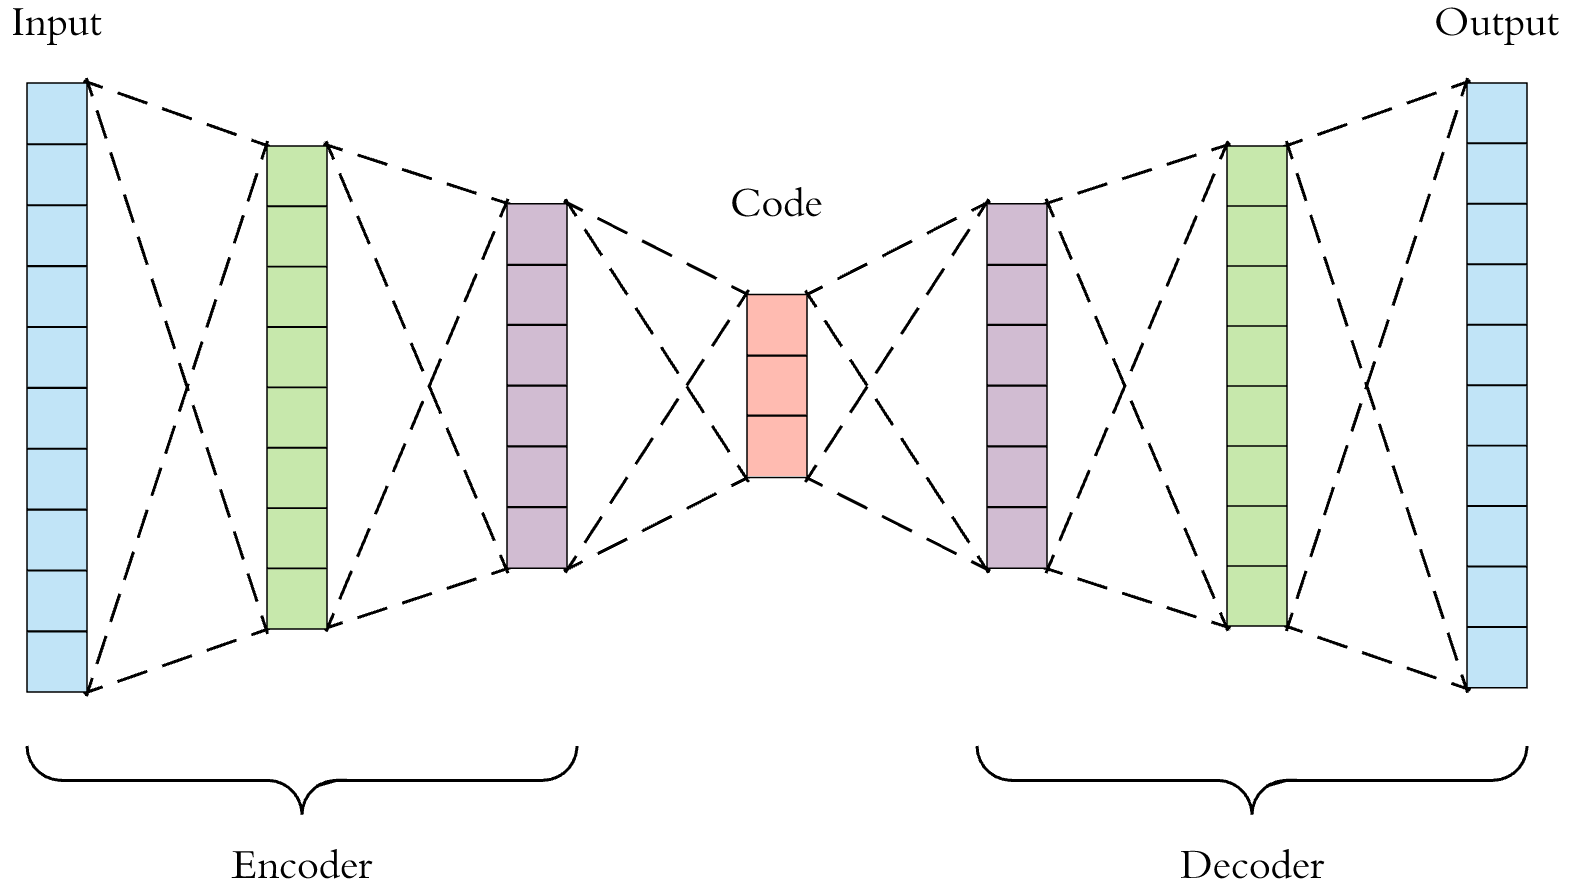


***Thanks Towards Data Science for this image, you can check their tutorial from this link: https://towardsdatascience.com/applied-deep-learning-part-3-autoencoders-1c083af4d798?gi=f7f61cfbffe***

There are several use fields of Autoencoders. You can use Autoencoders in order to avoid overfitting, data augmentation, denosing (cleaning images, signals or something) 

Let's implement it using Python.



In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.models import Model
from keras import layers
from keras.datasets import fashion_mnist


In [23]:
# Autoencoders is a unsupervised approach, so we don't need labels

(x_train,_),(x_test,_) = fashion_mnist.load_data()

print("Shape of x_train ",x_train.shape)
print("Shape o x_test   ",x_test.shape)

Shape of x_train  (60000, 28, 28)
Shape o x_test    (10000, 28, 28)


# Data Overview and Preprocessing
In this section I will take a look at the data and after that I will prepare the data.

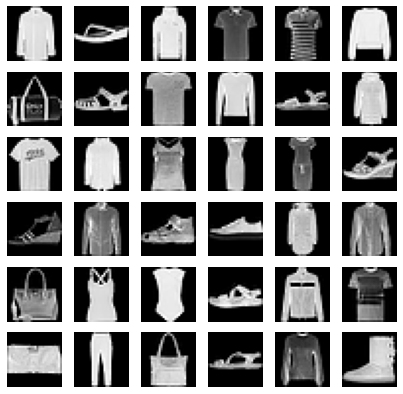

In [24]:
import random

plt.figure(figsize=(7,7))
for i in range(36):
    plt.subplot(6,6,i+1)
    # showing random samples
    plt.imshow(x_train[random.randint(0,len(x_train))],cmap="gray")
    plt.axis("off")
plt.show()

* As you can understand from its name, fashion mnist dataset includes images of clothes. There are 10 unique classes in this dataset.

Now let's prepare the data. First we'll rescale the data between 0 and 1, then we'll flatten the images (28x28 => 784)

In [25]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

x_train.shape

(60000, 28, 28)

* Now let's flatten the image

In [26]:
img_shape = x_train.shape
img_shape

(60000, 28, 28)

In [28]:
x_train = x_train.reshape(len(x_train),img_shape[1]*img_shape[2])
x_test = x_test.reshape(len(x_test),img_shape[1]*img_shape[2])

print("Shape of x_train is ",x_train.shape)
print("Shape of x_test  is ",x_test.shape)

Shape of x_train is  (60000, 784)
Shape of x_test  is  (10000, 784)


# Building and Compiling Our First Autoencoder
In this section I am going to build and compile our first autoencoder. 

There are several types of Autoencoders, such as Convolutional Autoencoders, Variational Autoencoders. But in this tutorial, we'll build a simple Autoencoder using simple Dense layers and ReLU activation function.

And we'll use Keras' Functional API


In [35]:
# Input layer
input_layer = layers.Input(shape=(784,))
# Encoding: 784 features to 32 features
encoder_layer1 = layers.Dense(32,activation="relu")(input_layer)
# Encoding: 32 features to 16 features
encoder_layer2 = layers.Dense(16,activation="relu")(encoder_layer1)
# Decoding: 16 features to 32 features
decoder_layer1 = layers.Dense(32,activation="relu")(encoder_layer2)
# Decoding: 32 features to 784 features
# Our images are scaled between 0 and 1 so we will use sigmoid
output_layer = layers.Dense(784,activation="sigmoid")(decoder_layer1)


autoencoder = Model(input_layer,output_layer)


autoencoder.compile(loss="binary_crossentropy",optimizer="RMSprop")


In [36]:
autoencoder.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_9 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_10 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_11 (Dense)             (None, 784)               25872     
Total params: 52,064
Trainable params: 52,064
Non-trainable params: 0
_________________________________________________________________


# Fitting Autoencoder
In this section I am going to train our autoencoder model.

In [37]:
history = autoencoder.fit(x_train,
                x_train,
                shuffle=True,
                epochs=200,
                validation_data=(x_test,x_test),
                batch_size=256
               )

# Autoencoders are supervised algorithms, so our labels are also our data.

Epoch 1/200
235/235 [==============================] - 2s 7ms/step - loss: 0.4090 - val_loss: 0.3589
Epoch 2/200
235/235 [==============================] - 2s 6ms/step - loss: 0.3418 - val_loss: 0.3316
Epoch 3/200
235/235 [==============================] - 2s 7ms/step - loss: 0.3264 - val_loss: 0.3237
Epoch 4/200
235/235 [==============================] - 2s 7ms/step - loss: 0.3201 - val_loss: 0.3216
Epoch 5/200
235/235 [==============================] - 2s 6ms/step - loss: 0.3158 - val_loss: 0.3152
Epoch 6/200
235/235 [==============================] - 2s 7ms/step - loss: 0.3127 - val_loss: 0.3137
Epoch 7/200
235/235 [==============================] - 2s 7ms/step - loss: 0.3103 - val_loss: 0.3103
Epoch 8/200
235/235 [==============================] - 2s 7ms/step - loss: 0.3083 - val_loss: 0.3106
Epoch 9/200
235/235 [==============================] - 2s 7ms/step - loss: 0.3067 - val_loss: 0.3067
Epoch 10/200
235/235 [==============================] - 2s 6ms/step - loss: 0.3053 - val_lo

235/235 [==============================] - 2s 7ms/step - loss: 0.2886 - val_loss: 0.2911
Epoch 82/200
235/235 [==============================] - 2s 6ms/step - loss: 0.2886 - val_loss: 0.2907
Epoch 83/200
235/235 [==============================] - 2s 6ms/step - loss: 0.2885 - val_loss: 0.2909
Epoch 84/200
235/235 [==============================] - 2s 6ms/step - loss: 0.2885 - val_loss: 0.2911
Epoch 85/200
235/235 [==============================] - 1s 6ms/step - loss: 0.2884 - val_loss: 0.2900
Epoch 86/200
235/235 [==============================] - 1s 6ms/step - loss: 0.2884 - val_loss: 0.2909
Epoch 87/200
235/235 [==============================] - 2s 6ms/step - loss: 0.2883 - val_loss: 0.2912
Epoch 88/200
235/235 [==============================] - 2s 7ms/step - loss: 0.2883 - val_loss: 0.2908
Epoch 89/200
235/235 [==============================] - 2s 6ms/step - loss: 0.2882 - val_loss: 0.2901
Epoch 90/200
235/235 [==============================] - 2s 6ms/step - loss: 0.2882 - val_loss: 

Epoch 161/200
235/235 [==============================] - 2s 6ms/step - loss: 0.2867 - val_loss: 0.2887
Epoch 162/200
235/235 [==============================] - 2s 6ms/step - loss: 0.2867 - val_loss: 0.2889
Epoch 163/200
235/235 [==============================] - 2s 7ms/step - loss: 0.2867 - val_loss: 0.2897
Epoch 164/200
235/235 [==============================] - 1s 6ms/step - loss: 0.2867 - val_loss: 0.2897
Epoch 165/200
235/235 [==============================] - 2s 6ms/step - loss: 0.2866 - val_loss: 0.2894
Epoch 166/200
235/235 [==============================] - 2s 7ms/step - loss: 0.2867 - val_loss: 0.2894
Epoch 167/200
235/235 [==============================] - 1s 6ms/step - loss: 0.2866 - val_loss: 0.2890
Epoch 168/200
235/235 [==============================] - 1s 6ms/step - loss: 0.2866 - val_loss: 0.2903
Epoch 169/200
235/235 [==============================] - 1s 6ms/step - loss: 0.2866 - val_loss: 0.2889
Epoch 170/200
235/235 [==============================] - 1s 6ms/step - lo

* Our model is trained, before examining training history, let's save our model's weights.

In [39]:
autoencoder.save_weights('autoencoder_model.h5')


* Now let's check our training history

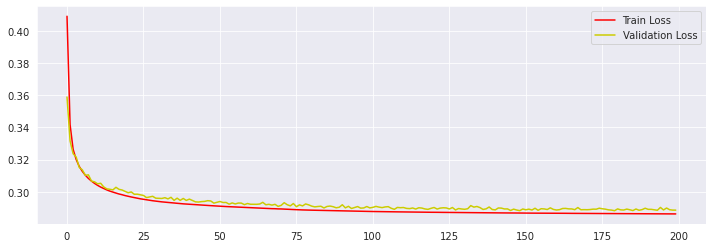

In [48]:
import seaborn
seaborn.set_style('darkgrid')
plt.figure(figsize=(12,4))
plt.plot(range(200),history.history["loss"],color="red",label="Train Loss")
plt.plot(range(200),history.history["val_loss"],color="#CCCC00",label="Validation Loss")
plt.legend()
plt.show()


# Testing Our Autoencoder
In this section I am going to test our autoencoder.

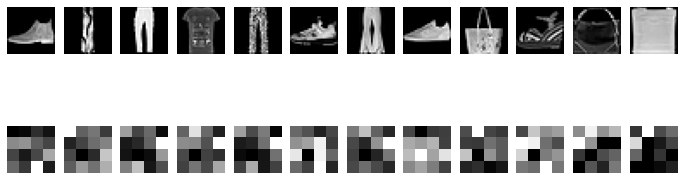

In [60]:
# In order to see encoded image, I will create an encoder using trained layers.
encoder = Model(input_layer,encoder_layer2)

# Let's check encoded images
encoded_images = encoder.predict(x_test)
encoded_images = encoded_images.reshape(-1,4,4)



# Visualize them
plt.figure(figsize=(12,4))
for i in range(12):
    plt.subplot(2,12,i+1)
    plt.imshow(x_test[32*i].reshape(28,28),cmap="gray")
    plt.axis("off")
    
    plt.subplot(2,12,i+13)
    plt.imshow(encoded_images[32*i].reshape(4,4),cmap="gray")
    plt.axis("off")

plt.show()

* And now let's decoded images.

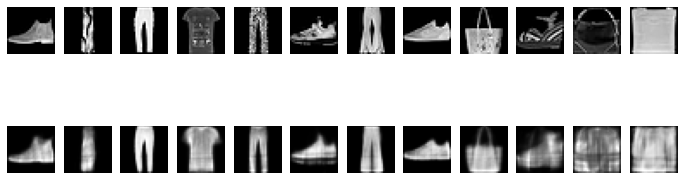

In [62]:
decoded_images = autoencoder.predict(x_test)

plt.figure(figsize=(12,4))
for i in range(12):
    plt.subplot(2,12,i+1)
    plt.imshow(x_test[32*i].reshape(28,28),cmap="gray")
    plt.axis("off")
    
    plt.subplot(2,12,i+13)
    plt.imshow(decoded_images[32*i].reshape(28,28),cmap="gray")
    plt.axis("off")

plt.show()

* Amazing, our autoencoder works well. It encoded and decoded our images greatly. It is really impressive.

# Conclusion
Thanks for your attention, if you have any question in your mind, please ask. I will definetely return.